<a href="https://colab.research.google.com/github/dbr-ufs/solar_fotovoltaica/blob/master/7_Irradi%C3%A2ncia_em_um_plano_inclinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transpondo a irradiância global (GHI) de céu claro para o plano inclinado dos módulos (POA)

Adaptado do link: https://pvlib-python.readthedocs.io/en/stable/auto_examples/plot_ghi_transposition.html

Este exemplo mostra como usar o método
:py:meth:`pvlib.location.Location.get_clearsky` para gerar dados de irradiância global (GHI) de céu claro assim como como se usa a função
:py:meth:`pvlib.irradiance.get_total_irradiance` para transpor para o plano inclinado dos módulos (POA).



In [ ]:
try:
  import pvlib
except ImportError:
  !pip install pvlib
  import pvlib

from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# For this example, we will be using Curitiba
tz = 'America/Sao_Paulo'
lat, lon = -25.4284, -49.2733

# Create location object to store lat, lon, timezone
site = location.Location(lat, lon, tz=tz)

## Criando Funções

In [23]:
# Calculate clear-sky GHI and transpose to plane of array
# Define a function so that we can re-use the sequence of operations with
# different locations
def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Creates one day's worth of 10 min intervals
    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = site_location.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = site_location.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})

### Gerando gráficos usando a função definida acima

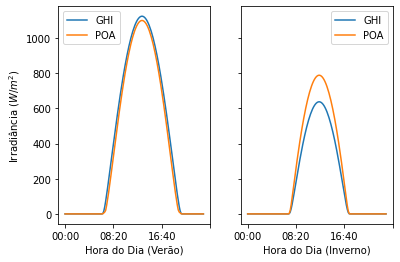

In [22]:
# Get irradiance data for summer and winter solstice, assuming 10 degree tilt
# in relation to latitude and a North facing array
summer_irradiance = get_irradiance(site, '12-21-2020', abs(lat)-10, 0)
winter_irradiance = get_irradiance(site, '06-21-2020', abs(lat)-10, 0)

# Convert Dataframe Indexes to Hour:Minute format to make plotting easier
summer_irradiance.index = summer_irradiance.index.strftime("%H:%M")
winter_irradiance.index = winter_irradiance.index.strftime("%H:%M")

# Plot GHI vs. POA for winter and summer
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
summer_irradiance['GHI'].plot(ax=ax1, label='GHI')
summer_irradiance['POA'].plot(ax=ax1, label='POA')
winter_irradiance['GHI'].plot(ax=ax2, label='GHI')
winter_irradiance['POA'].plot(ax=ax2, label='POA')
ax1.set_xlabel('Hora do Dia (Verão)')
ax2.set_xlabel('Hora do Dia (Inverno)')
ax1.set_ylabel('Irradiância ($W/m^2$)')
ax1.legend()
ax2.legend()
plt.show()

Observe que, no verão, não há muito ganho ao comparar a irradiância do POA com o GHI. No inverno, entretanto, a irradiância do POA é significativamente maior do que o GHI. Isso ocorre porque, no inverno, o sol está muito mais baixo no céu, portanto, um painel inclinado igual a (Latitude - 10°) terá um ângulo mais ideal em comparação com uma matriz plana. No verão, o sol fica muito mais alto no céu, e há muito pouco ganho para uma matriz inclinada em comparação com uma matriz plana.



### Tarefa

Encontre as inclinações (tilt) ótimas para Curitiba nos dias de solstício de verão e inverno.

# Desafio

Reproduza a animação do site PVEducation, onde se varia a latitude e a inclinação do módulo. Como resultado, obtêm-se a irradiância global no plano horizontal, no plano inclinado (POA) e a incidente (simulando o seguimento perfeito do Sol em dois eixos): https://www.pveducation.org/es/fotovoltaica/2-propiedades-de-la-luz-del-sol/la-radiaci%C3%B3n-solar-sobre-una-superficie-inclinada